In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Baseball.csv')

In [4]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
df.shape

(30, 17)

There are 17 columns and 30 row

In [6]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

Except ERA all the data are integer type

In [7]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [8]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

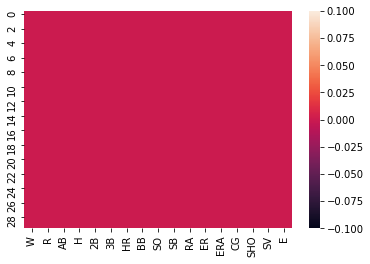

In [9]:
sn.heatmap(df.isnull())

There is no null value

# Visualization

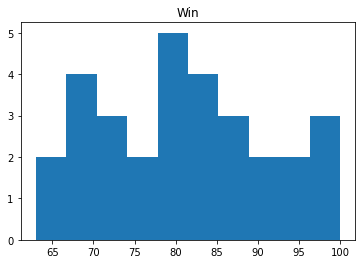

In [13]:
plt.title("Win")
plt.hist(df["W"],bins=10)
plt.show()

 between 80-85 number of win is more

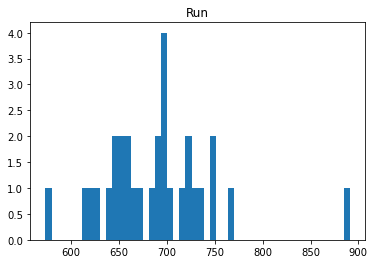

In [15]:
plt.title("Run")
plt.hist(df["R"],bins=50)
plt.show()

most number of run scored between 650 to 700

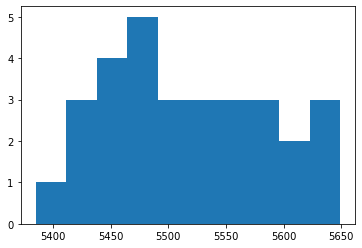

In [17]:

plt.hist(df["AB"],bins=10)
plt.show()

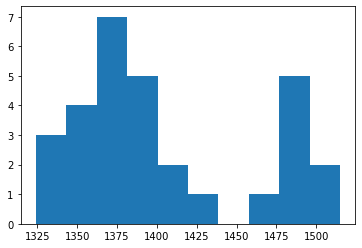

In [18]:
plt.hist(df["H"],bins=10)
plt.show()

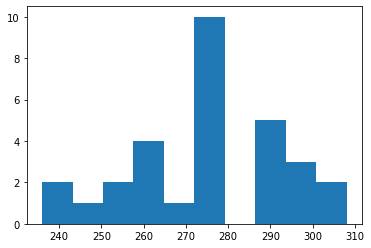

In [19]:
plt.hist(df["2B"],bins=10)
plt.show()

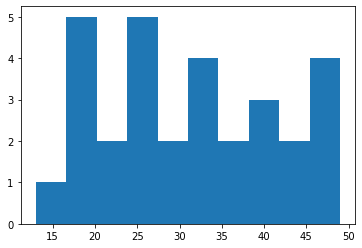

In [22]:
plt.hist(df["3B"],bins=10)
plt.show()

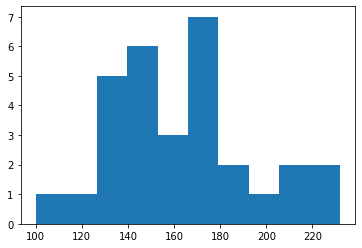

In [23]:
plt.hist(df["HR"],bins=10)
plt.show()

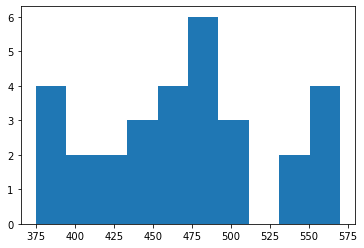

In [24]:
plt.hist(df["BB"],bins=10)
plt.show()

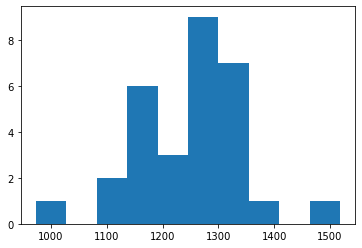

In [25]:
plt.hist(df["SO"],bins=10)
plt.show()

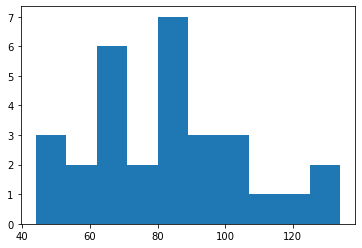

In [26]:
plt.hist(df["SB"],bins=10)
plt.show()

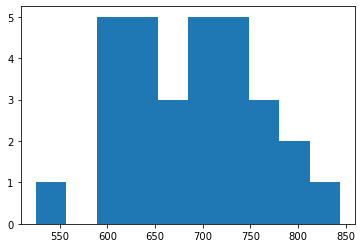

In [27]:
plt.hist(df["RA"],bins=10)
plt.show()

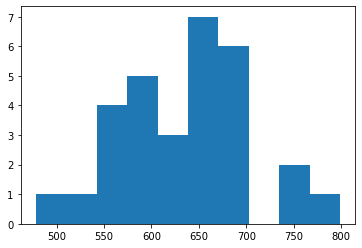

In [28]:
plt.hist(df["ER"],bins=10)
plt.show()

<AxesSubplot:xlabel='ERA', ylabel='Density'>

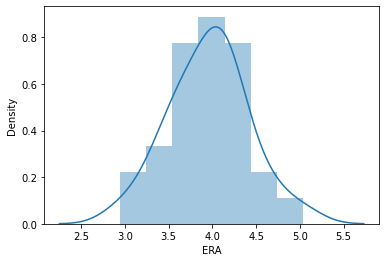

In [30]:
sn.distplot(df['ERA'], kde=True)

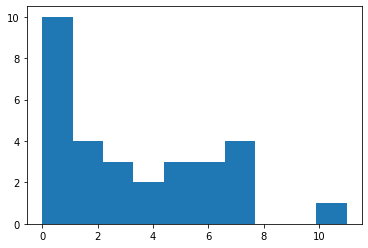

In [36]:
plt.hist(df["CG"],bins=10)
plt.show()

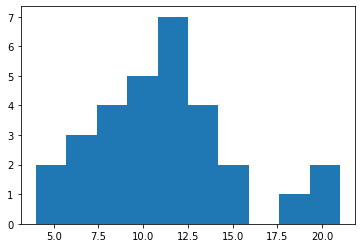

In [32]:
plt.hist(df["SHO"],bins=10)
plt.show()

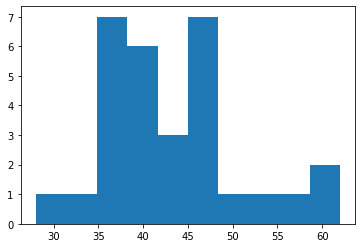

In [33]:
plt.hist(df["SV"],bins=10)
plt.show()

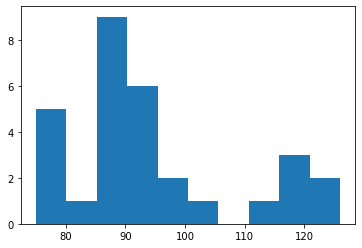

In [34]:
plt.hist(df["E"],bins=10)
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x1e71f646790>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1e71f646220>,
 'cmins': <matplotlib.collections.LineCollection at 0x1e71f646160>,
 'cbars': <matplotlib.collections.LineCollection at 0x1e71f646190>}

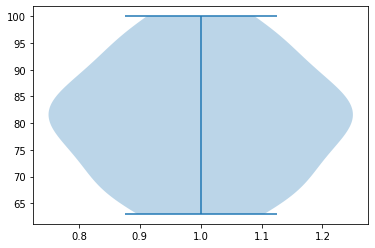

In [37]:
plt.violinplot(df['W'])

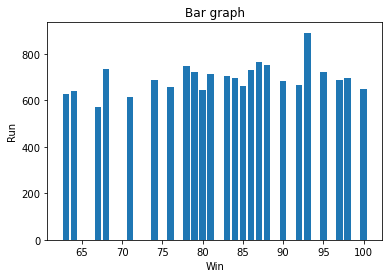

In [38]:
plt.title("Bar graph")
plt.xlabel("Win")
plt.ylabel("Run")
plt.bar(df["W"],df["R"])
plt.show()

if run is 800 or more win is between 90-95 and if run is more than 600 then chances of win is high

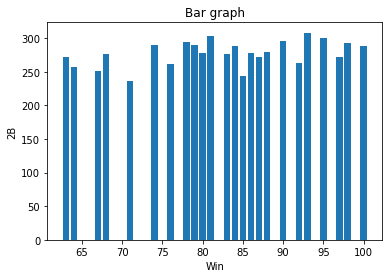

In [40]:
plt.title("Bar graph")
plt.xlabel("Win")
plt.ylabel("2B")
plt.bar(df["W"],df["2B"])
plt.show()

If double is between 250-290 chances of win is high

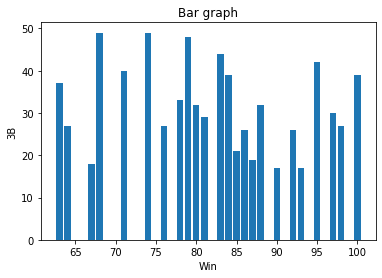

In [42]:
plt.title("Bar graph")
plt.xlabel("Win")
plt.ylabel("3B")
plt.bar(df["W"],df["3B"])
plt.show()

# Checking Outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x1e71f728610>,
 'caps': [<matplotlib.lines.Line2D at 0x1e71f728cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e71f7282b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e71f7233d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e71f723730>],
 'means': []}

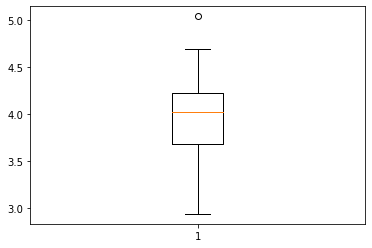

In [43]:
plt.boxplot(df['ERA'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e71f7fb5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e71f7fbca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e71f7fb280>],
 'medians': [<matplotlib.lines.Line2D at 0x1e71f8053a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e71f805700>],
 'means': []}

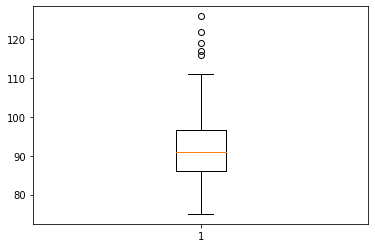

In [44]:
plt.boxplot(df['E'])

In [45]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [46]:
df1=df[(z<3).all(axis=1)]
df1

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [47]:
df.shape

(30, 17)

There is no outlier

In [48]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [49]:
df1.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.390451,-0.085780,-0.018360,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.029594,0.497526,0.749290,-0.072858
R,0.390451,1.000000,0.438022,0.433525,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.101438,-0.085108,0.061381,0.043123
AB,-0.085780,0.438022,1.000000,0.769159,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.078511,-0.198872,-0.113342,0.316297
H,-0.018360,0.433525,0.769159,1.000000,0.528016,0.582024,-0.218711,-0.222271,-0.371861,0.417877,0.244606,0.280571,0.256458,0.092577,-0.135116,-0.079814,-0.011945
2B,0.384886,0.469293,0.490752,0.528016,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.244856,0.084060,0.269999,0.145032
3B,-0.206737,0.134204,0.445604,0.582024,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.003733,-0.058896,-0.210627,0.108610
HR,0.245697,0.586894,-0.064653,-0.218711,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.065978,0.005546,0.066984,-0.189790
BB,0.447513,0.258450,-0.137850,-0.222271,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.417437,0.473922,0.187101,-0.050114
SO,0.156469,0.081158,-0.111243,-0.371861,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.053075,0.231230,0.091394,0.142740
SB,-0.169503,0.075323,0.373674,0.417877,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.030708,-0.104602,-0.179741,0.082702


<AxesSubplot:>

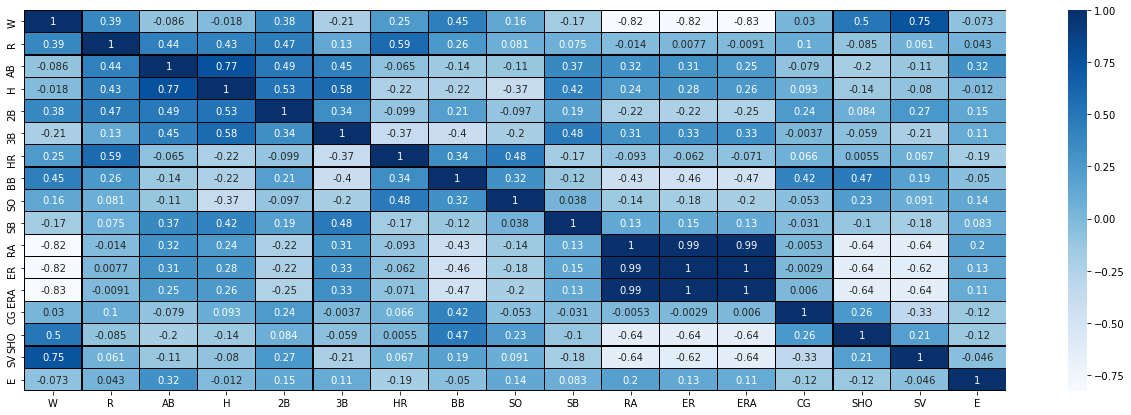

In [50]:
plt.figure(figsize=(22,7))
sn.heatmap(df1.corr(),cmap='Blues',linewidths=0.1,linecolor="black",annot=True)

There are are high corelation between ER and ERA with win

In [51]:
x=df.iloc[:,1:17]
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [52]:
y=df.iloc[:,0]
y.head()

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [54]:
lg=LogisticRegression()

In [56]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lg.fit(x_train,y_train)
    pred_train=lg.predict(x_train)
    pred_test=lg.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 1.0
At random state 0,the testing accuracy is:- 0.0


At random state 1,the training accuracy is:- 1.0
At random state 1,the testing accuracy is:- 0.0


At random state 2,the training accuracy is:- 1.0
At random state 2,the testing accuracy is:- 0.0


At random state 3,the training accuracy is:- 1.0
At random state 3,the testing accuracy is:- 0.0


At random state 4,the training accuracy is:- 1.0
At random state 4,the testing accuracy is:- 0.0


At random state 5,the training accuracy is:- 1.0
At random state 5,the testing accuracy is:- 0.0


At random state 6,the training accuracy is:- 1.0
At random state 6,the testing accuracy is:- 0.0


At random state 7,the training accuracy is:- 1.0
At random state 7,the testing accuracy is:- 0.0


At random state 8,the training accuracy is:- 1.0
At random state 8,the testing accuracy is:- 0.0


At random state 9,the training accuracy is:- 1.0
At random state 9,the testing accuracy is:- 0.0


At random 

At random state 82,the training accuracy is:- 1.0
At random state 82,the testing accuracy is:- 0.0


At random state 83,the training accuracy is:- 1.0
At random state 83,the testing accuracy is:- 0.0


At random state 84,the training accuracy is:- 1.0
At random state 84,the testing accuracy is:- 0.0


At random state 85,the training accuracy is:- 1.0
At random state 85,the testing accuracy is:- 0.0


At random state 86,the training accuracy is:- 1.0
At random state 86,the testing accuracy is:- 0.0


At random state 87,the training accuracy is:- 1.0
At random state 87,the testing accuracy is:- 0.0


At random state 88,the training accuracy is:- 1.0
At random state 88,the testing accuracy is:- 0.0


At random state 89,the training accuracy is:- 1.0
At random state 89,the testing accuracy is:- 0.0


At random state 90,the training accuracy is:- 1.0
At random state 90,the testing accuracy is:- 0.0


At random state 91,the training accuracy is:- 0.9583333333333334
At random state 91,the tes

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=33)

In [58]:
x_train.shape

(20, 16)

In [59]:
x_test.shape

(10, 16)

In [60]:
y_train.shape

(20,)

In [61]:
y_test.shape

(10,)

In [62]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.1
              precision    recall  f1-score   support

          68       0.50      1.00      0.67         1
          74       0.00      0.00      0.00         1
          78       0.00      0.00      0.00         0
          79       0.00      0.00      0.00         1
          80       0.00      0.00      0.00         1
          81       0.00      0.00      0.00         0
          84       0.00      0.00      0.00         1
          86       0.00      0.00      0.00         0
          87       0.00      0.00      0.00         0
          90       0.00      0.00      0.00         0
          93       0.00      0.00      0.00         1
          95       0.00      0.00      0.00         1
          97       0.00      0.00      0.00         1
          98       0.00      0.00      0.00         1
         100       0.00      0.00      0.00         1

    accuracy                           0.10        10
   macro avg       0.03      0.07      0.04        10
weighted

In [63]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.0
              precision    recall  f1-score   support

          63       0.00      0.00      0.00       0.0
          67       0.00      0.00      0.00       0.0
          68       0.00      0.00      0.00       1.0
          74       0.00      0.00      0.00       1.0
          76       0.00      0.00      0.00       0.0
          79       0.00      0.00      0.00       1.0
          80       0.00      0.00      0.00       1.0
          84       0.00      0.00      0.00       1.0
          86       0.00      0.00      0.00       0.0
          87       0.00      0.00      0.00       0.0
          88       0.00      0.00      0.00       0.0
          92       0.00      0.00      0.00       0.0
          93       0.00      0.00      0.00       1.0
          95       0.00      0.00      0.00       1.0
          97       0.00      0.00      0.00       1.0
          98       0.00      0.00      0.00       1.0
         100       0.00      0.00      0.00       1.0

    accu

In [64]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.0
              precision    recall  f1-score   support

          63       0.00      0.00      0.00       0.0
          68       0.00      0.00      0.00       1.0
          74       0.00      0.00      0.00       1.0
          78       0.00      0.00      0.00       0.0
          79       0.00      0.00      0.00       1.0
          80       0.00      0.00      0.00       1.0
          81       0.00      0.00      0.00       0.0
          83       0.00      0.00      0.00       0.0
          84       0.00      0.00      0.00       1.0
          87       0.00      0.00      0.00       0.0
          90       0.00      0.00      0.00       0.0
          92       0.00      0.00      0.00       0.0
          93       0.00      0.00      0.00       1.0
          95       0.00      0.00      0.00       1.0
          97       0.00      0.00      0.00       1.0
          98       0.00      0.00      0.00       1.0
         100       0.00      0.00      0.00       1.0

    accu

In [65]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.1
              precision    recall  f1-score   support

          68       0.33      1.00      0.50         1
          74       0.00      0.00      0.00         1
          76       0.00      0.00      0.00         0
          79       0.00      0.00      0.00         1
          80       0.00      0.00      0.00         1
          81       0.00      0.00      0.00         0
          83       0.00      0.00      0.00         0
          84       0.00      0.00      0.00         1
          93       0.00      0.00      0.00         1
          95       0.00      0.00      0.00         1
          97       0.00      0.00      0.00         1
          98       0.00      0.00      0.00         1
         100       0.00      0.00      0.00         1

    accuracy                           0.10        10
   macro avg       0.03      0.08      0.04        10
weighted avg       0.03      0.10      0.05        10



In [66]:
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
pred=kn.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.0
              precision    recall  f1-score   support

          63       0.00      0.00      0.00       0.0
          64       0.00      0.00      0.00       0.0
          68       0.00      0.00      0.00       1.0
          74       0.00      0.00      0.00       1.0
          76       0.00      0.00      0.00       0.0
          79       0.00      0.00      0.00       1.0
          80       0.00      0.00      0.00       1.0
          81       0.00      0.00      0.00       0.0
          84       0.00      0.00      0.00       1.0
          93       0.00      0.00      0.00       1.0
          95       0.00      0.00      0.00       1.0
          97       0.00      0.00      0.00       1.0
          98       0.00      0.00      0.00       1.0
         100       0.00      0.00      0.00       1.0

    accuracy                           0.00      10.0
   macro avg       0.00      0.00      0.00      10.0
weighted avg       0.00      0.00      0.00      10.0



# Cross Validation

In [69]:
from sklearn.model_selection import cross_val_score

In [70]:
print(cross_val_score(lg,x,y,cv=2).mean())

0.03333333333333333


In [71]:
print(cross_val_score(dt,x,y,cv=2).mean())

0.03333333333333333


In [72]:
print(cross_val_score(rf,x,y,cv=2).mean())

0.03333333333333333


In [74]:
print(cross_val_score(svc,x,y,cv=2).mean())

0.03333333333333333


In [75]:
print(cross_val_score(kn,x,y,cv=2).mean())

0.0


# Hyper parameter Tuning

In [76]:
from sklearn.model_selection import GridSearchCV

In [92]:
parameter={'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }


In [95]:
GV=GridSearchCV(lg,parameter,cv=2)

In [96]:
GV.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']})

In [97]:
GV.best_params_

{'C': 0.00026366508987303583,
 'max_iter': 2500,
 'penalty': 'l1',
 'solver': 'saga'}

In [100]:
Finallg=LogisticRegression(penalty='l1', C=0.00026366508987303583, max_iter=2500,solver='saga')
Finallg.fit(x_train,y_train)
pred=Finallg.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.1
              precision    recall  f1-score   support

          68       0.10      1.00      0.18         1
          74       0.00      0.00      0.00         1
          79       0.00      0.00      0.00         1
          80       0.00      0.00      0.00         1
          84       0.00      0.00      0.00         1
          93       0.00      0.00      0.00         1
          95       0.00      0.00      0.00         1
          97       0.00      0.00      0.00         1
          98       0.00      0.00      0.00         1
         100       0.00      0.00      0.00         1

    accuracy                           0.10        10
   macro avg       0.01      0.10      0.02        10
weighted avg       0.01      0.10      0.02        10



# Saving Model

In [101]:
import pickle
filename = 'Baseball.pkl'
pickle.dump(Finallg, open(filename, 'wb'))

In [102]:
loaded_model = pickle.load(open('Baseball.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.1
